# Figure 2.

Surface temperature (shading, $K$) and horizontal wind vectors in the upper troposphere (250 $hPa$ level) in the (left column) Trappist-1e case and (right column) Proxima b case in (a, b) *MassFlux* and (c-f) sensitivity simulations. The surface temperature in the (c, d) *Adjust* and (e, f) *NoCnvPm* simulations is shown as the difference relative to the *MassFlux* simulation.

[Skip code and jump to the figure](#Show-the-figure)

----------------------------------

Import the necessary libraries.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

import numpy as np

In [3]:
from aeolus.calc import last_year_mean
from aeolus.core import Run

In [4]:
from commons import (
    GLM_MODEL_TIMESTEP,
    PLANET_ALIASES,
    RUN_ALIASES,
    output_name_prefix,
)
from gl_diag import interp_to_pressure_levels
import mypaths
from plot_func import (
    CART_KW,
    MARKER_KW,
    add_aux_yticks,
    add_custom_legend,
    draw_scalar_cube,
    draw_vector_cubes,
    make_map_figure,
    use_style,
)

Global stylesheet for figures.

In [5]:
use_style()

## Load data

Create a dictionary of `Run` objects with preprocessed data.

In [6]:
runs = {}
for planet in PLANET_ALIASES.keys():
    for run_key in RUN_ALIASES.keys():
        label = f"{planet}_{run_key}"

        fname = mypaths.sadir / label / "_processed" / f"{label}.nc"

        runs[label] = Run(
            files=fname,
            name=label,
            planet=planet,
            timestep=GLM_MODEL_TIMESTEP,
            processed=True,
        )

## Plot the results

Pressure level of the horizontal wind

In [7]:
P_LEVEL = 250 * 1e2  # Pa

Plot settings

In [8]:

# Axes grid specs
AXGR_KW = dict(
    axes_pad=(0.7, 0.4),
    cbar_location="right",
    cbar_mode="each",
    cbar_pad=0.1,
    cbar_size="3%",
    label_mode="",
)

# Plot style for wind vectors
quiver_kw = dict(
    scale_units="inches",
    scale=125,
    facecolors=("#444444"),
    edgecolors=("#EEEEEE"),
    linewidths=0.3,
    width=0.004,
    headaxislength=4,
)

Colormap for the surface temperature differences

In [9]:
cmap_tdiff = plt.cm.coolwarm
cmap_tdiff.set_under("navy")
cmap_tdiff.set_over("darkred")

In [10]:
fig, axgr = make_map_figure(2, 3, **AXGR_KW)
cbar_axes_col = np.array(axgr.cbar_axes).reshape((3, 2)).T

for i, (planet, ax_col, cbar_ax_col) in enumerate(
    zip(PLANET_ALIASES, axgr.axes_column, cbar_axes_col)
):

    run_key = "grcs"
    ax, cax = ax_col[0], cbar_ax_col[0]
    label = f"{planet}_{run_key}"

    cube_ref = last_year_mean(runs[label].proc.extract_strict("surface_temperature"))

    u_ref = last_year_mean(
        interp_to_pressure_levels(runs[label].proc, "x_wind", [P_LEVEL])
    )
    v_ref = last_year_mean(
        interp_to_pressure_levels(runs[label].proc, "y_wind", [P_LEVEL])
    )

    ax.set_title(PLANET_ALIASES[planet], fontsize="large", pad=5, loc="center")
    ax.set_title(RUN_ALIASES[run_key], fontsize="medium", pad=5, loc="right")

    draw_scalar_cube(
        cube_ref,
        ax,
        "contourf",
        cax,
        "$K$",
        cmap="plasma",
        levels=np.arange(160, 300, 20),
        extend="both",
    )
    draw_vector_cubes(
        u_ref, v_ref, ax, xstride=8, ystride=6, qk_ref_wspd=30, **quiver_kw, **CART_KW,
    )

    for run_key, ax, cax in zip([*RUN_ALIASES.keys()][1:], ax_col[1:], cbar_ax_col[1:]):

        label = f"{planet}_{run_key}"
        cube_sens = last_year_mean(
            runs[label].proc.extract_strict("surface_temperature")
        )
        cube_diff = cube_sens - cube_ref

        u_sens = last_year_mean(
            interp_to_pressure_levels(runs[label].proc, "x_wind", [P_LEVEL])
        )
        v_sens = last_year_mean(
            interp_to_pressure_levels(runs[label].proc, "y_wind", [P_LEVEL])
        )

        ax.set_title(RUN_ALIASES[run_key], fontsize="medium", pad=5, loc="right")

        cb_lim = np.round(np.percentile(np.abs(cube_diff.data), 95), -1) + 1

        draw_scalar_cube(
            cube_diff,
            ax,
            "contourf",
            cax,
            "$K$",
            cmap="coolwarm",
            levels=np.linspace(-30, 30, 16),
            cbar_ticks=np.linspace(-30, 30, 16),
            extend="both",
        )
        draw_vector_cubes(u_sens, v_sens, ax, xstride=8, ystride=6, **quiver_kw, **CART_KW)

plt.close()  # Show the figure in a separate cell

## Show the figure

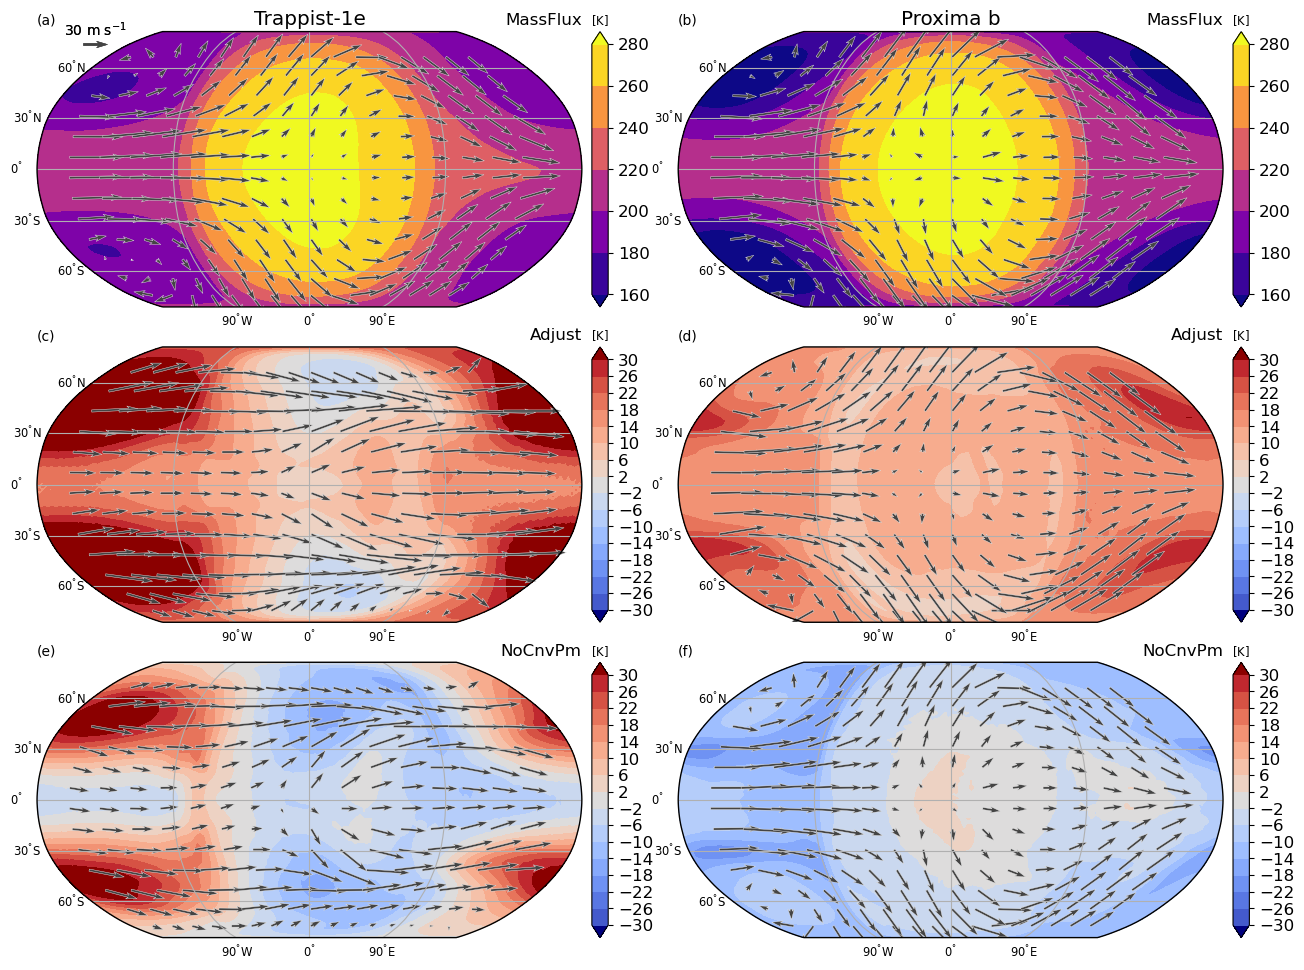

In [11]:
fig

And save it.

In [12]:
imgname = (
    mypaths.plotdir / f"{output_name_prefix}__tsfc_winds__plev{P_LEVEL/100:.0f}hpa.png"
)

In [13]:
fig.savefig(imgname, dpi=200)
print(f"Saved to ../{imgname.relative_to(mypaths.topdir)}")

Saved to ../plots/trap1e_proxb__grcs_llcs_all_rain_acoff__tsfc_winds__plev250hpa.png
